### Model evaluation
 Evaluate model worked using test images. Evaluation is done for model 3 in report for 2 cases:
- before adding early stopping callback function
- after adding early stopping callback function

The evaluation is done by showing the following:
- confusion matrix 
- classification report


In [1]:
import os
import pathlib

from dotenv import dotenv_values

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def evaluation_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    plot_confusion_matrix(actual,
                          predicted,
                          title = "model's confusion matrix")

In [3]:
#get values from .env file
config = dotenv_values(".env")

In [4]:
#assign values in .env to variables
raw_dir = config['RAW_PATH']
batch_size = int(config['BATCH_SIZE'])
img_dim = int(config['DIM']) # image dimension

In [5]:
#path for segmented testing dataset
raw_dir_segmented = raw_dir + '/splitDataset/Segmented'
test_dir_sg = pathlib.Path(raw_dir_segmented + '/test/') # turn testing path into a Python path

In [6]:
# create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in test_dir_sg.glob('*')])) 
print(class_names)

['Benign' 'Early' 'Pre' 'Pro']


In [7]:
# Load in model 3 before and after enhancement (adding early stopping) and evaluate it
model_before = load_model("saved_model/final_model_without_early_stopping.h5")
model_after = load_model("saved_model/final_model_with_early_stopping.h5")

In [8]:
# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [9]:
# Create data batches
print("Test images:")
test_data_sg = test_datagen.flow_from_directory(test_dir_sg,
                                                target_size=(img_dim, img_dim),
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                shuffle=False)

Test images:
Found 525 images belonging to 4 classes.


In [10]:
#predict images
before_prediction_result = model_before.predict(test_data_sg)
after_prediction_result = model_after.predict(test_data_sg)

In [11]:
#get labels
correct_labels = test_data_sg.labels
before_predicted_labels = np.argmax(before_prediction_result,axis = 1)
after_predicted_labels = np.argmax(after_prediction_result,axis = 1)

Results for model 3 before adding early stopping: 
0 = Benign, 1 = Early, 2 = Pre, 3 = Pro
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        82
           1       0.99      1.00      1.00       158
           2       0.98      0.99      0.99       155
           3       1.00      1.00      1.00       130

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525



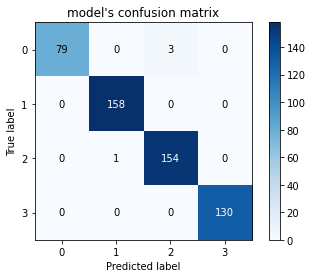

In [12]:
#view results
print("Results for model 3 before adding early stopping: ")
print(f"0 = {class_names[0]}, 1 = {class_names[1]}, 2 = {class_names[2]}, 3 = {class_names[3]}")
evaluation_metrics(correct_labels, before_predicted_labels)

Results for model 3 after adding early stopping: 
0 = Benign, 1 = Early, 2 = Pre, 3 = Pro
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        82
           1       1.00      0.99      1.00       158
           2       0.98      1.00      0.99       155
           3       1.00      0.99      1.00       130

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525



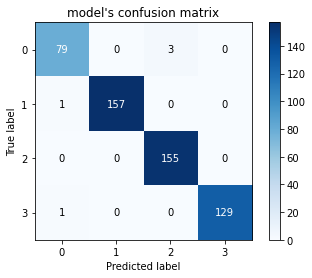

In [13]:
print("Results for model 3 after adding early stopping: ")
print(f"0 = {class_names[0]}, 1 = {class_names[1]}, 2 = {class_names[2]}, 3 = {class_names[3]}")
evaluation_metrics(correct_labels, after_predicted_labels)